In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Read csv file
cities_file="../Resources/cities.csv"
cities_data = pd.read_csv(cities_file)
cities_list = cities_data["City"].unique()

cities_list

array(['ostrovnoy', 'mahebourg', 'qaanaaq', 'zhuhai', 'cape town',
       'atuona', 'flinders', 'opuwo', 'tiksi', 'pushkinskiye gory',
       'aykhal', 'castro', 'avarua', 'saskylakh', 'constitucion',
       'albany', 'vilyuysk', 'ushuaia', 'bambous virieux', 'kodinsk',
       'teknaf', 'busselton', 'ambon', 'maragogi', 'fallon', 'kantang',
       'colonelganj', 'punta arenas', 'rikitea', 'new norfolk', 'gobabis',
       'qingdao', 'port hardy', 'arman', 'mamakan', 'bethel', 'clinton',
       'varhaug', 'ayan', 'mayor pablo lagerenza', 'hermanus', 'torbay',
       'yellowknife', 'kruisfontein', 'puerto ayora', 'rosita', 'beloha',
       'port elizabeth', 'port alfred', 'garchitorena', 'kodiak',
       'mar del plata', 'taybad', 'cabo san lucas', 'tiarei', 'khatanga',
       'pisco', 'kolyvan', 'hofn', 'bontang', 'sault sainte marie',
       'zhigansk', 'thompson', 'pevek', 'nanortalik', 'bilibino',
       'dikson', 'hambantota', 'beja', 'fortuna', 'ponta do sol',
       'qasigiannguit'

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



606

In [4]:
#Build query url and get response
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 115.3333, 'lat': -33.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 54.05,
  'feels_like': 52.59,
  'temp_min': 53.1,
  'temp_max': 54.05,
  'pressure': 1015,
  'humidity': 73,
  'sea_level': 1015,
  'grnd_level': 1015},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 269, 'gust': 17.74},
 'clouds': {'all': 100},
 'dt': 1626951027,
 'sys': {'type': 2,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1626909454,
  'sunset': 1626946338},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [5]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [6]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 48:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : yazd
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : saint-philippe
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : rikitea
Processing Record 6 of Set 1 : nikolskoye
City not found. Skipping...
Processing Record 7 of Set 1 : vaini
Processing Record 8 of Set 1 : bluff
Processing Record 9 of Set 1 : maldonado
Processing Record 10 of Set 1 : new norfolk
Processing Record 11 of Set 1 : yulara
Processing Record 12 of Set 1 : nueva gerona
Processing Record 13 of Set 1 : hilo
Processing Record 14 of Set 1 : chokurdakh
Processing Record 15 of Set 1 : severo-kurilsk
Processing Record 16 of Set 1 : copperas cove
Processing Record 17 of Set 1 : puerto ayora
City not found. Skipping...
Processing Record 18 of Set 1 : yellowknife
Processing Record 19 of Set 1 : leningradskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 1 

In [7]:
#Creating a Dataframe
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})
weather_data.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Clouds        558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [86]:
#Export dataframe into a .csv
weather_data.to_csv("Output/city_weather.csv", index=False, header=True)
#Display the dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Yazd,31.8972,54.3675,100.51,11,20,9.22,IR,1626951381
1,Arraial do Cabo,-22.9661,-42.0278,55.36,100,20,0.00,BR,1626951031
2,Saint-Philippe,-21.3585,55.7679,76.59,74,34,15.17,RE,1626951381
3,Mataura,-46.1927,168.8643,43.48,97,14,2.66,NZ,1626951030
4,Rikitea,-23.1203,-134.9692,71.94,70,3,13.71,PF,1626951010


In [9]:
#Summary Statistics
weather_data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.968924,19.964830,70.834767,67.969534,52.677419,8.349516,1.626951e+09
std,33.444701,89.431056,15.534394,23.264249,39.094278,6.166997,1.305227e+02
min,-54.800000,-175.200000,32.360000,1.000000,0.000000,0.000000,1.626951e+09
25%,-8.024500,-59.741650,58.620000,54.000000,11.000000,3.637500,1.626951e+09
50%,23.788350,21.883350,73.300000,74.000000,59.500000,6.910000,1.626951e+09
75%,48.583250,100.220600,80.992500,86.000000,92.000000,11.597500,1.626951e+09
max,78.218600,179.316700,121.150000,100.000000,100.000000,34.520000,1.626952e+09


In [10]:
#Inspect the data and remove the cities which have humidity>100%
humidity_less = weather_data[weather_data['Humidity'] < 100]
humidity_less.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.854163,21.487859,71.063073,67.503636,52.547273,8.370564,1.626951e+09
std,33.311167,89.006125,15.483995,23.107238,39.107630,6.172625,1.277450e+02
min,-54.800000,-175.200000,32.360000,1.000000,0.000000,0.000000,1.626951e+09
25%,-7.687450,-57.551450,59.275000,54.000000,11.000000,3.717500,1.626951e+09
50%,23.325000,23.393400,73.635000,74.000000,58.500000,6.910000,1.626951e+09
75%,48.158050,101.413600,81.070000,85.000000,92.000000,11.640000,1.626951e+09
max,78.218600,179.316700,121.150000,99.000000,100.000000,34.520000,1.626952e+09


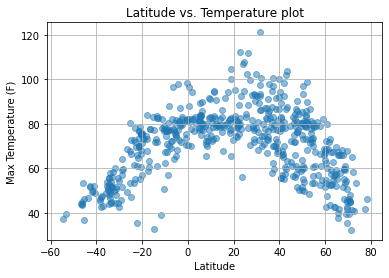

<Figure size 432x288 with 0 Axes>

In [11]:
#Plotting the data
# Use proper labelling of the plot using plot titles,including data of analysis and axes labels
#Latitude vs. Temperature plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], alpha=0.5)
plt.title("Latitude vs. Temperature plot")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Max Temperature.png")

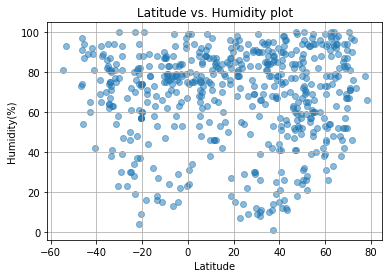

<Figure size 432x288 with 0 Axes>

In [12]:
#Latitude vs. Humidity plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], alpha=0.5)
plt.title("Latitude vs. Humidity plot")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Humidity.png")

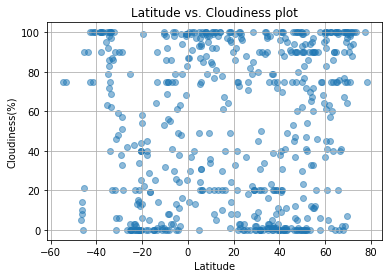

<Figure size 432x288 with 0 Axes>

In [13]:
#Latitude vs. Cloudiness plot
plt.scatter(weather_data['Lat'], weather_data['Clouds'], alpha=0.5)
plt.title("Latitude vs. Cloudiness plot")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Clouds.png")

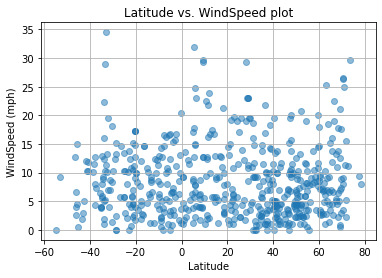

<Figure size 432x288 with 0 Axes>

In [14]:
#Latitude vs. WindSpeed plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], alpha=0.5)
plt.title("Latitude vs. WindSpeed plot")
plt.ylabel("WindSpeed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Wind Speed.png")

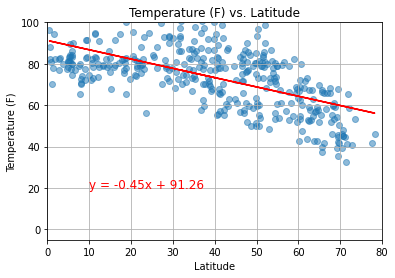

The r-value is:-0.5953835060244541


In [77]:
###Linear Regression
#Northern Hemisphere - Temperature (F) vs. Latitude
northern_hemis= weather_data[weather_data['Lat']>=0]
northern_hemis
plt.scatter(northern_hemis['Lat'], northern_hemis['Max Temp'], alpha=0.5)
x_values = northern_hemis["Lat"]
y_values = northern_hemis["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Temperature (F) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

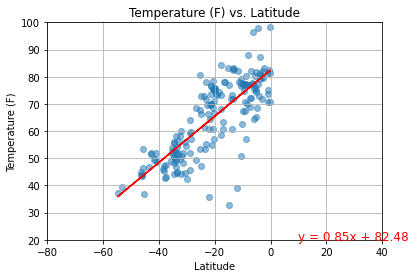

The r-value is:0.7909198136134327


In [78]:
#Southern Hemisphere - Temperature (F) vs. Latitude
southern_hemis= weather_data[weather_data['Lat']<0]
southern_hemis
plt.scatter(southern_hemis['Lat'], southern_hemis['Max Temp'], alpha=0.5)
x_values = southern_hemis["Lat"]
y_values = southern_hemis["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Temperature (F) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(20, 100)
plt.xlim(-80, 40)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

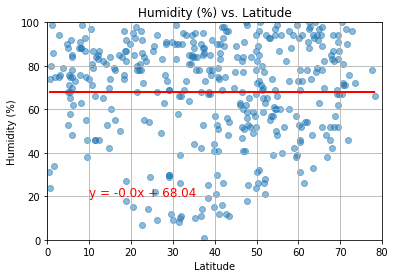

The r-value is:-0.0004550762874213807


In [79]:
#Northern Hemisphere - Humidity (%) vs. Latitude
northern_hemis1= weather_data[weather_data['Lat']>=0]
northern_hemis1
plt.scatter(northern_hemis1['Lat'], northern_hemis1['Humidity'], alpha=0.5)
x_values = northern_hemis1["Lat"]
y_values = northern_hemis1["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Humidity (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(0, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

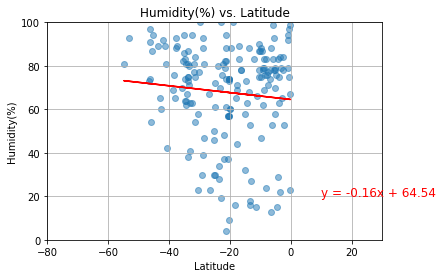

The r-value is:-0.09391479076048426


In [81]:
# Southern Hemisphere - Humidity (%) vs. Latitude
southern_hemis1= weather_data[weather_data['Lat']<0]
southern_hemis1
plt.scatter(southern_hemis1['Lat'],southern_hemis1['Humidity'], alpha=0.5)
x_values = southern_hemis1["Lat"]
y_values = southern_hemis1["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Humidity(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(-80, 30)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

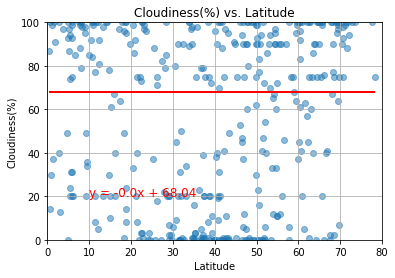

The r-value is:-0.0004550762874213807


In [82]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
northern_hemis2= weather_data[weather_data['Lat']>=0]
northern_hemis2
plt.scatter(northern_hemis2['Lat'], northern_hemis2['Clouds'], alpha=0.5)
x_values = northern_hemis2["Lat"]
y_values = northern_hemis2["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Cloudiness(%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(0, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

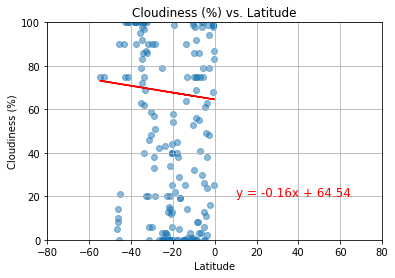

The r-value is:-0.09391479076048426


In [83]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
southern_hemis2= weather_data[weather_data['Lat']<0]
southern_hemis2
plt.scatter(southern_hemis2['Lat'], southern_hemis2['Clouds'], alpha=0.5)
x_values = southern_hemis2["Lat"]
y_values = southern_hemis2["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Cloudiness (%) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(0, 100)
plt.xlim(-80, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

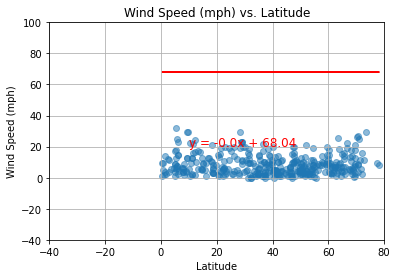

The r-value is:-0.0004550762874213807


In [84]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
northern_hemis4= weather_data[weather_data['Lat']>=0]
northern_hemis4
plt.scatter(northern_hemis4['Lat'], northern_hemis4['Wind Speed'], alpha=0.5)
x_values = northern_hemis4["Lat"]
y_values = northern_hemis4["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.title("Wind Speed (mph) vs. Latitude")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-40, 100)
plt.xlim(-40, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")

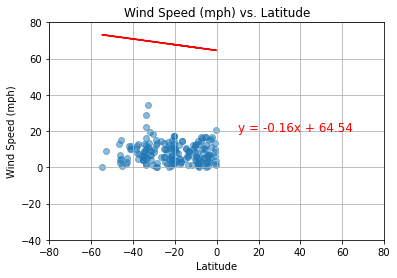

The r-value is:-0.09391479076048426


In [85]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
southern_hemis4= weather_data[weather_data['Lat']<0]
southern_hemis4
plt.scatter(southern_hemis4['Lat'], southern_hemis4['Wind Speed'], alpha=0.5)
x_values = southern_hemis4["Lat"]
y_values = southern_hemis4["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-40,80)
plt.xlim(-80, 80)
plt.grid()
plt.show()
print(f"The r-value is:{rvalue}")